In [1]:
#pip install imblearn

In [2]:
import numpy as np
import numpy
import pandas as pd
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [3]:
mesames = read_csv('mes11_ano20.csv', delimiter=",", low_memory=False, keep_default_na=False)

In [4]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [5]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [6]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [7]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [8]:
#mesames = mesames.drop(mesames.columns[12], axis=1)

In [9]:
#
mesames

,DESC_RESP,DIARREIA,DISPNEIA,DOR_ABD,FADIGA,FEBRE,GARGANTA,PERD_OLFT,PERD_PALA,SATURACAO,TOSSE,VOMITO,CLASSI_FIN
0,1,2,1,0,0,1,2,0,0,1,1,2,0
1,1,2,1,0,0,1,2,0,0,1,1,2,0
2,1,2,1,0,0,1,1,0,0,1,1,2,1
3,1,2,1,0,0,1,2,0,0,1,1,2,0
4,1,2,2,0,0,1,2,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,1,2,1,2,1,2,2,2,2,1,1,2,1
26054,1,2,1,0,0,1,2,0,0,1,1,2,0
26055,1,2,1,0,0,1,2,0,0,1,1,2,1
26056,1,1,1,2,2,2,1,2,2,1,1,2,0


In [10]:
dataset = mesames.values
# split data into X and y
n, m = mesames.shape 
X = dataset[:,0:m-1]
Y = dataset[:,m-1]

Accuracy: 62.40%
              precision    recall  f1-score   support

           0       0.52      0.20      0.29      3288
           1       0.64      0.89      0.74      5312

    accuracy                           0.62      8600
   macro avg       0.58      0.54      0.52      8600
weighted avg       0.60      0.62      0.57      8600



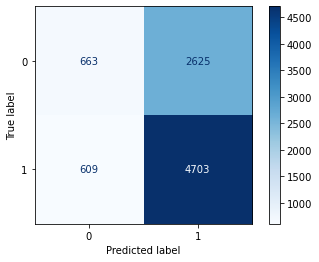

In [11]:
#
seed = 7
#
test_size = 0.33
#
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#
model = XGBClassifier()
#
model.fit(X_train, y_train)

#
y_pred = model.predict(X_test)

#
predictions = [round(value) for value in y_pred]

#
accuracy = accuracy_score(y_test, predictions)

#
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))
#
#
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')


In [12]:
#
seed = 7
#
test_size = 0.33

#
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, shuffle=True, stratify=Y)
#
oversampled = SMOTE(sampling_strategy=0.7, random_state=0, k_neighbors=4)

#
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)


#
model = XGBClassifier()
#
model.fit(X, Y)


#
y_pred = model.predict(X_test)
#
predictions = [round(value) for value in y_pred]

#
accuracy = accuracy_score(y_test, predictions)

#
print("Accuracy: %.2f%%" % (accuracy * 100.0))




Accuracy: 65.50%


In [40]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value
#print(shap_values)
#print(expected_value)


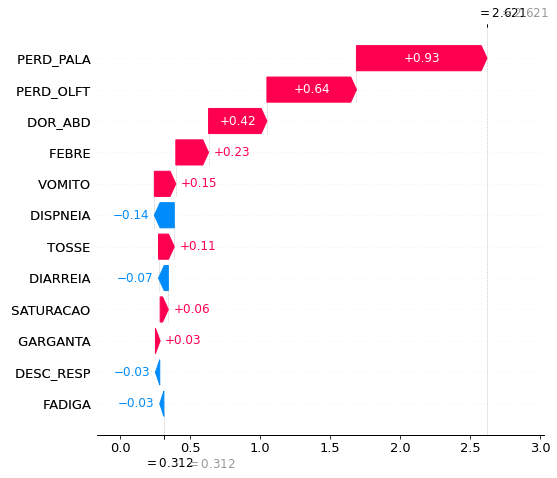

In [41]:
# O gráfico é calculado por sample, ou seja, cada linha possui seu shap value
# O  valor inferior no gráfico é base value ou Expected value E[f(x)] e f(x) a predição do modelo 
# E[f(x)] é o valor que seria previsto se não conhecêssemos nenhuma feature para a saída atual
# Em outras palavras, é a previsão média, ou média(y)
# Assim, E[f(x)] número médio previsto casos de covid entre todas as observações
# O valor final f(x) é o número previsto de casos para esta observação.

i= 1000
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[m-i], features = X[m-i,:], feature_names=['DESC_RESP','DIARREIA',
                  'DISPNEIA','DOR_ABD','FADIGA','FEBRE','GARGANTA',
                  'PERD_OLFT','PERD_PALA','SATURACAO','TOSSE','VOMITO'], max_display = 30)

In [231]:
#d_x = pd.DataFrame(X, columns = ['DESC_RESP','DIARREIA',
  #                'DISPNEIA','DOR_ABD','FADIGA','FEBRE','GARGANTA',
  #                'PERD_OLFT','PERD_PALA','SATURACAO','TOSSE','VOMITO'])


In [232]:
#shap.initjs()

#d_xx = d_x.to_numpy()

# As variáveis estão em ordem descendente de importância
# A posição no eixo y é determinada pela feature e o eixo x pelo valor Shapley. 
# Os pontos sobrepostos são distorcidos na direção do eixo y, então temos uma noção da distribuição dos valores de Shapley 
#por recurso.
# A cor mostra se o valor da váriável é alto ou baixo para a observação: alto = rosa, baixo = azul
# Positivo = +x, negativo -x

# Generate summary dot plot
#shap.summary_plot(shap_values,d_xx, max_display = 30, feature_names=['DESC_RESP','DIARREIA',
                  #'DISPNEIA','DOR_ABD','FADIGA','FEBRE','GARGANTA',
                  #'PERD_OLFT','PERD_PALA','SATURACAO','TOSSE','VOMITO'])

In [233]:
#shap.summary_plot(shap_values, d_x, plot_type="bar")

In [234]:
mesames = read_csv('mes12_ano21.csv', delimiter=",", low_memory=False, keep_default_na=False)

In [235]:
dfmes = mesames[['SATURACAO','FEBRE','DISPNEIA','VOMITO','GARGANTA','DOR_ABD','CLASSI_FIN']]

In [236]:
#dfmes

In [237]:
dfmes.to_csv("df_mes12_ano21.csv")